In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from plotnine import ggplot, aes, geom_point, scale_color_manual, theme, geom_boxplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel


data = pd.read_csv("https://raw.githubusercontent.com/ethanweinberg1002/CPSC392/main/bank-additional.csv", delimiter=';')

# Specify all variables as selected features
all_features = data.columns.drop('y')
selected_features = all_features.tolist()

# Extract features and target variable
X = data[selected_features]
y = data['y']


# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Feature selection based on model coefficients
feature_selector = SelectFromModel(model, prefit=True)
selected_features = X.columns[feature_selector.get_support()]

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)

# Display results
print(f"Selected Features: {selected_features}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Create a DataFrame with actual and predicted labels
results_df = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_pred})

# Display the DataFrame
print(results_df)

# Assuming you have a new individual's data in a dictionary
new_data = {
    'age': int(input("what is your age? (enter an age between 18 and 80)")),
    'job': "management",
    'marital': "married",
    'education': "university.degree",
    'balance': 2500,
    'housing': "yes",
    'loan': "no",
    'contact': "cellular",
    'day': 15,
    'month': "may",
    'duration': 180
}

# Convert the new data to a DataFrame
new_df = pd.DataFrame([new_data])

# Extract categorical features from the training data
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month']

# Apply one-hot encoding using the same categories as the training data
new_df_encoded = pd.get_dummies(new_df, columns=categorical_features, drop_first=True)

# Ensure that all columns present in the training data are also present in the new data
missing_columns = set(X.columns) - set(new_df_encoded.columns)
for column in missing_columns:
    new_df_encoded[column] = 0  # Add missing columns with default values

# Reorder columns to match the order during training
new_df_encoded = new_df_encoded[X.columns]

# Standardize the features
new_df_scaled = scaler.transform(new_df_encoded)

# Make predictions using the trained model
new_prediction = model.predict(new_df_scaled)

# Convert the binary prediction to a more interpretable result
prediction_result = 'Will Subscribe' if new_prediction[0] == 1 else 'Will Not Subscribe'

# Display the prediction result
print(f"The model predicts that the individual {prediction_result}.")


Selected Features: Index(['duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_entrepreneur', 'job_self-employed',
       'marital_unknown', 'education_university.degree', 'contact_telephone',
       'month_jun', 'month_mar', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')
Model Accuracy: 90.41%
     Actual Labels Predicted Labels
889            yes              yes
2669            no               no
2707            no               no
2258            no               no
2514           yes               no
...            ...              ...
2488           yes              yes
949             no               no
3883            no               no
2059            no               no
3514            no               no

[824 rows x 2 columns]
what is your age? (18-80)50
The model predicts that the individual Will Not Subscribe.


C:\Users\Ethan\AppData\Local\Temp\ipykernel_38508\222595700.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


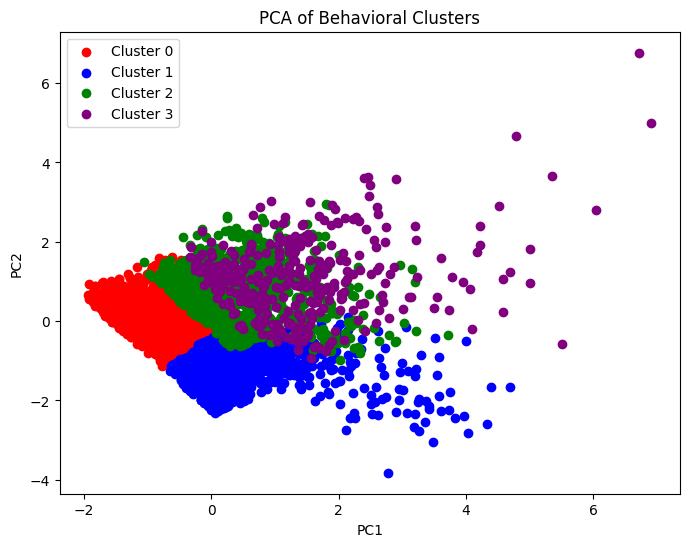

   cluster        age  nr.employed    duration
0        0  34.834475  5213.913128  188.588470
1        1  53.398058  5178.887282  202.085437
2        2  35.514342  5068.090504  218.511375
3        3  40.776074  5177.511963  914.846626


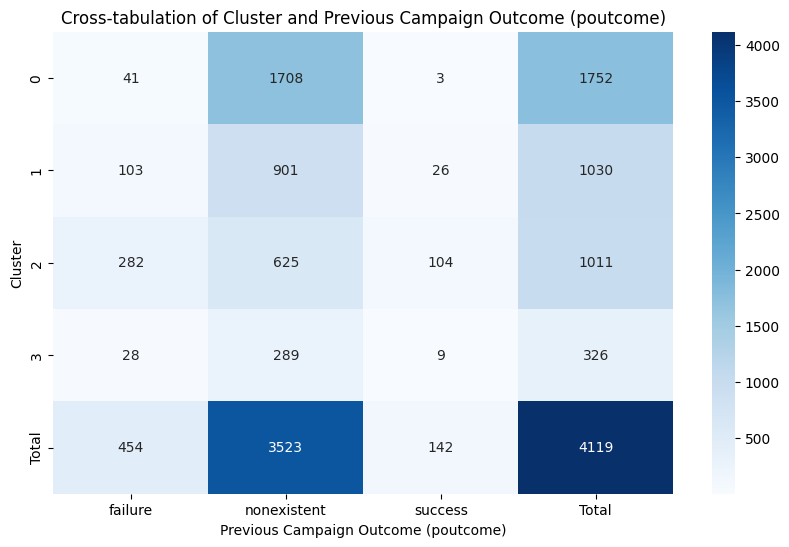

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/ethanweinberg1002/CPSC392/main/bank-additional.csv", delimiter=';')

# Select relevant features for clustering
clustering_features = ['age', 'nr.employed', 'duration']

# Extract features for clustering
X_cluster = data[clustering_features]

# Z-score normalization for continuous variables
X_cluster[clustering_features] = StandardScaler().fit_transform(X_cluster[clustering_features])

# Choose the number of clusters (you can adjust this based on analysis)
num_clusters = 4

# Apply K-Means clustering
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
data['cluster'] = kmeans_model.fit_predict(X_cluster)

# Perform PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_cluster)

# Create a DataFrame with PC1 and PC2
scatterplot_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
scatterplot_df['cluster'] = data['cluster']

# Create a scatterplot with PC1 and PC2 using matplotlib
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple']
for cluster in range(num_clusters):
    cluster_data = scatterplot_df[scatterplot_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', color=colors[cluster])

plt.title("PCA of Behavioral Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# Analyze cluster characteristics
cluster_summary = data.groupby('cluster').agg({
    'age': 'mean',
    'nr.employed': 'mean',
    'duration': 'mean',
}).reset_index()

print(cluster_summary)



# Assuming 'data' is your DataFrame with the clustering results and 'poutcome' column
# Make sure 'poutcome' is converted to a categorical type for better visualization

data['poutcome'] = data['poutcome'].astype('category')

# Cross-tabulation between 'cluster' and 'poutcome'
cross_tab = pd.crosstab(data['cluster'], data['poutcome'], margins=True, margins_name='Total')

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Cross-tabulation of Cluster and Previous Campaign Outcome (poutcome)')
plt.xlabel('Previous Campaign Outcome (poutcome)')
plt.ylabel('Cluster')
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


# Replace 'target_column' with the actual column name representing the outcome ('y')
target_column = 'y'

# Separate features and target variable
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Original set of economic indicators
# Replace 'economic_columns' with the actual list of economic indicators
economic_columns = ['emp.var.rate', 'cons.price.idx', 'euribor3m']
X_train_original = X_train[economic_columns]
X_test_original = X_test[economic_columns]

# PCA on economic indicators
n_components = 2  
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_original)
X_test_pca = pca.transform(X_test_original)

# Build a classifier using Random Forest as an example
classifier_original = RandomForestClassifier(random_state=42)
classifier_original.fit(X_train_original, y_train)

classifier_pca = RandomForestClassifier(random_state=42)
classifier_pca.fit(X_train_pca, y_train)

# Make predictions
y_pred_original = classifier_original.predict(X_test_original)
y_pred_pca = classifier_pca.predict(X_test_pca)

# Evaluate accuracy
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Display results
print(f"Accuracy using original economic indicators: {accuracy_original * 100:.2f}%")
print(f"Accuracy using PCA-reduced dimensions: {accuracy_pca * 100:.2f}%")


Accuracy using original economic indicators: 89.56%
Accuracy using PCA-reduced dimensions: 89.56%
